In [4]:
#SVM-Boosting based on Markov resampling: Theory and algorithm✩
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

In [6]:
#importing dataset of letter recognisation
Datam = pd.read_csv("Magic.csv")
Datal = pd.read_csv("letter-recognition.csv")
Datal=Datal.rename({'letter': 'class'}, axis=1)

In [7]:
Datal

,class,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [8]:

Datam = Datam.sample(frac=1,random_state=42).reset_index(drop=True)
Datam=Datam.drop(['Unnamed: 0'],axis = 1)
Datam

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,48.0573,11.0862,2.9571,0.3620,0.1882,0.4200,32.4358,-2.2992,26.9300,165.2240,h
1,23.4858,0.0000,2.2393,0.7378,0.3775,-2.9397,13.0915,0.0001,19.3410,235.3420,g
2,40.5429,19.4073,3.3382,0.2369,0.1269,29.1908,27.0567,-7.1243,10.0643,195.6030,g
3,16.6123,7.8423,2.5572,0.5829,0.3371,6.7271,-10.3448,-2.3240,14.5111,214.2655,h
4,205.4250,37.7936,3.2727,0.2167,0.1257,46.0952,-210.9350,-29.7478,60.0580,206.1730,h
...,...,...,...,...,...,...,...,...,...,...,...
19015,31.9212,16.7667,2.6566,0.3837,0.2348,3.7913,21.0170,3.4354,3.0450,249.3750,g
19016,43.4538,17.6541,2.9965,0.2621,0.1426,-12.4850,-23.2863,-11.3567,6.2607,184.7290,g
19017,19.9926,12.0866,2.4354,0.5725,0.3982,16.1410,16.3239,9.4374,12.7719,193.8930,g
19018,31.4336,23.2651,2.9340,0.2957,0.1717,-9.1278,19.8518,19.2893,79.9590,23.2363,g


In [9]:
Datal=Datal.replace(['A','B','C','D','E','F','G','H','I','J','K','L','M'],1)

In [10]:
Datal=Datal.replace(['N','O','P','Q','R','S','T','U','V','W','X','Y','Z'],-1)
Datal

,class,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,-1,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,1,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,-1,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,1,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,1,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,-1,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,-1,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [11]:
#printing letters in order
m=len(Datam['class'])
count0=0
for i in range(m):
  # print(Datam['letter'][i])
  if ord(Datam['class'][i])==ord('g'):
    # label.append(1)
    Datam['class'][i]=1
    count0+=1
  else:
    if ord(Datam['class'][i])==ord('h'):
    # label.append(-1) 
     Datam['class'][i]=-1  
print(count0)
Datam

<ipython-input-11-063385071aec>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Datam['class'][i]=-1
<ipython-input-11-063385071aec>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Datam['class'][i]=1


12332


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,48.0573,11.0862,2.9571,0.3620,0.1882,0.4200,32.4358,-2.2992,26.9300,165.2240,-1
1,23.4858,0.0000,2.2393,0.7378,0.3775,-2.9397,13.0915,0.0001,19.3410,235.3420,1
2,40.5429,19.4073,3.3382,0.2369,0.1269,29.1908,27.0567,-7.1243,10.0643,195.6030,1
3,16.6123,7.8423,2.5572,0.5829,0.3371,6.7271,-10.3448,-2.3240,14.5111,214.2655,-1
4,205.4250,37.7936,3.2727,0.2167,0.1257,46.0952,-210.9350,-29.7478,60.0580,206.1730,-1
...,...,...,...,...,...,...,...,...,...,...,...
19015,31.9212,16.7667,2.6566,0.3837,0.2348,3.7913,21.0170,3.4354,3.0450,249.3750,1
19016,43.4538,17.6541,2.9965,0.2621,0.1426,-12.4850,-23.2863,-11.3567,6.2607,184.7290,1
19017,19.9926,12.0866,2.4354,0.5725,0.3982,16.1410,16.3239,9.4374,12.7719,193.8930,1
19018,31.4336,23.2651,2.9340,0.2957,0.1717,-9.1278,19.8518,19.2893,79.9590,23.2363,1


In [12]:
Data_trainm=Datam.sample(frac=0.666667)
Data_trainl=Datal.sample(frac=0.666667)
Data_testm = Datam.drop(Data_trainm.index)
Data_testl= Datal.drop(Data_trainl.index)
# Data_train=Data_train.sample(n=2000,replace='False')
print(Data_trainm.shape)
Data_trainm

(12680, 11)


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
7865,90.9615,40.3365,3.9254,0.1054,0.0530,-3.5037,70.5168,-38.9276,0.8542,257.9210,1
4160,84.4400,35.3814,3.7420,0.1953,0.1004,-6.9577,52.0089,7.6456,1.1700,353.4410,1
2151,21.1612,6.9873,2.0626,0.7186,0.3939,-23.2157,-12.0341,-6.2376,52.3913,45.2924,1
17720,23.4645,16.0261,2.4116,0.4186,0.2384,10.9010,12.7104,10.5489,33.0410,44.4753,1
18287,40.8309,17.2319,3.0154,0.2510,0.1337,-42.7736,-17.5628,9.6436,0.5730,167.2160,1
...,...,...,...,...,...,...,...,...,...,...,...
8349,22.9956,14.8647,2.4871,0.4169,0.2231,-15.3437,9.2633,11.9746,47.9304,128.1310,1
15597,123.9870,17.4709,2.7906,0.2980,0.1547,-190.1050,84.4861,13.0368,0.8130,351.0380,1
985,23.9355,15.7287,2.4393,0.4836,0.2564,-20.9615,-11.3804,7.0833,86.6051,211.7680,1
4367,12.7634,11.6137,2.1446,0.7240,0.3620,-14.9998,-0.5440,11.6225,65.0592,106.7060,1


In [13]:
print(Data_trainl.shape)
Data_trainl
# Data_trainl=Datal.rename({'letter': 'class'}, axis=1)

(13333, 17)


,class,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
13510,1,6,12,4,6,2,6,9,6,8,11,8,10,2,8,5,9
5300,-1,4,8,6,6,3,5,8,2,8,10,10,9,3,8,3,6
17625,1,2,0,2,1,1,5,8,5,8,7,6,12,0,8,7,9
99,-1,7,11,8,9,4,3,9,6,7,11,11,10,3,9,2,6
14585,-1,3,5,4,3,2,4,10,1,7,10,10,6,1,11,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14230,1,2,9,3,6,1,12,3,10,3,13,6,13,1,6,0,8
13479,1,4,5,6,8,6,7,5,5,2,6,4,6,5,7,8,8
19445,-1,3,4,4,3,1,4,12,3,3,10,11,7,2,11,1,8
5283,-1,1,1,2,1,1,5,11,7,1,9,6,4,1,9,3,8


In [14]:
def svm_random(Data_train,Data_test):
  pp=0;
  linear_model = SVC(kernel='linear')
  accs=[]
  while pp<20:
    Data_random=Data_train.sample(n=500)
    X_train = Data_random.drop(['class'],axis = 1)
    y_train = Data_random['class']
    y_train=y_train.astype('int')
    X_test = Data_test.drop(['class'],axis = 1)
    y_test =  Data_test['class']
    y_test=y_test.astype('int')
    linear_model.fit(X_train,y_train)
    y_pred = linear_model.predict(X_test)
    pp+=1
    acc=metrics.accuracy_score(y_true = y_test,y_pred = y_pred)
    accs.append(1-acc)
  plt.title("misclassification graph for random")  
  plt.xlabel("X axis")  
  plt.ylabel("Y axis")  
  plt.plot(np.arange(1,21), accs, color ="red")  
  plt.show()
  return 100*np.mean(accs),100*np.std(accs)

In [15]:
def loss(f,z):
  if f*z>1:
    return 0
  else:
    return (1-f*z)

In [16]:
import math
def markovsampling(df):
  linear_model = SVC(kernel='linear')
  
  
  T=5
  N=len(df)
  rsample = df[0:0]
  t=0
  while t<T:
    sample = df[0:0]
    dtr=df.copy()
    X_train = dtr.drop(['class'],axis = 1)
    y_train = dtr['class']
    y_train=y_train.astype('int')
    linear_model.fit(X_train,y_train)
    kvalmax=5
    kval=0
    m0=0
    m1=0
    zt=dtr.sample(n=1)
    ztl=zt.to_numpy()
    id=len(sample)
    sample = sample.append(pd.DataFrame(ztl,index=[id+1],columns=sample.columns))
    dtr=dtr.drop(zt.index)
    yl=zt['class'].to_numpy()
    yt=yl[0]
    if yt==-1:
      m0+=1
    else:
      m1+=1
    ydt=linear_model.predict(zt.drop(['class'],axis = 1))
    
    i=0
    while i<N and len(dtr)>0:
      id=len(sample)
      zst=dtr.sample(n=1)
      zstl=zst.to_numpy()
      dtr=dtr.drop(zst.index)
      ysl=zst['class'].to_numpy()
      yst=ysl[0]
      ydst=linear_model.predict(zst.drop(['class'],axis = 1))
      pr=math.exp(-loss(ydst,ydst))/math.exp(-loss(ydt,yt))
      if pr==1 and yt==-1 and yst==-1:
        sample = sample.append(pd.DataFrame(zstl,index=[id+1],columns=sample.columns))
      elif pr==1 and yt==1 and yst==1:
        sample = sample.append(pd.DataFrame(zstl,index=[id+1],columns=sample.columns))
      elif (pr==1 and yt*yst==-1) or pr<0:
        sample = sample.append(pd.DataFrame(zstl,index=[id+1],columns=sample.columns))
      elif pr>1:
        sample = sample.append(pd.DataFrame(zstl,index=[id+1],columns=sample.columns))
      elif kval==kvalmax:
        sample = sample.append(pd.DataFrame(zstl,index=[id+1],columns=sample.columns))
        kval=0
      else:
        kval+=1
      zt=zst
      if yst==-1:
       m0+=1
      else:
       m1+=1
    i=i+1
    # print(len(sample))
    X_train = sample.drop(['class'],axis = 1)
    y_train = sample['class']
    y_train=y_train.astype('int')
    linear_model.fit(X_train,y_train)
    rsample=sample
    t=t+1
  return rsample
    


In [17]:
def svm_markov(Data_train,Data_test):
  pp=0;
  linear_model = SVC(kernel='linear')
  accs=[]
  while pp<2:
    dtr=Data_train.sample(n=500)
    dtr.reset_index(drop=True, inplace=True)  
    Data_markov=markovsampling(dtr)
    # print(Data_markov.shape)
    X_train = Data_markov.drop(['class'],axis = 1)
    y_train = Data_markov['class']
    y_train=y_train.astype('int')
    X_test = Data_test.drop(['class'],axis = 1)
    y_test =  Data_test['class']
    y_test=y_test.astype('int')
    linear_model.fit(X_train,y_train)
    y_pred = linear_model.predict(X_test)
    acc=metrics.accuracy_score(y_true = y_test,y_pred = y_pred)
    accs.append(1-acc)
    pp+=1
  plt.title("misclassification graph for markov")  
  plt.xlabel("X axis")  
  plt.ylabel("Y axis")  
  plt.plot(np.arange(1,21), accs, color ="red")  
  plt.show()
  return 100*np.mean(accs),100*np.std(accs)

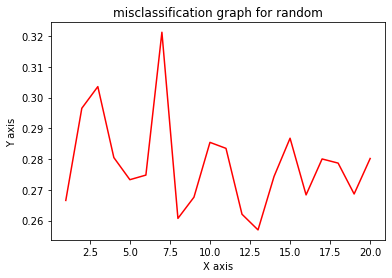

mean misclassification rate for random sample with std for letter (27.848357582120887, 1.5016959322029855)


In [18]:
print("mean misclassification rate for random sample with std for letter",svm_random(Data_trainl,Data_testl))

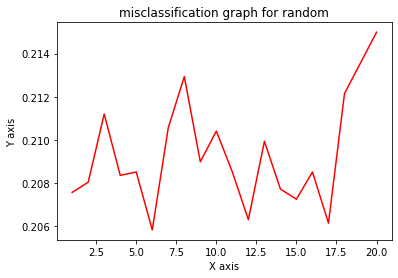

mean misclassification rate for random sample with std for magic (20.937697160883282, 0.24841520192941585)


In [20]:
print("mean misclassification rate for random sample with std for magic",svm_random(Data_trainm,Data_testm))